In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.linalg import eigh
from sklearn.decomposition import PCA

In [2]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'sans',
    'font.size': 14,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
def generate_syn_data_two_class(n: int):   
    np.random.seed(100)
    
    cov = [[5,2],[2,1]]
    class_1 = np.random.multivariate_normal(mean=(0,0), cov=cov, size=n)
    class_2 = np.random.multivariate_normal(mean=(0,5), cov=cov, size=n)
    y_1 = np.ones(shape=n)
    y_2 = np.ones(shape=n) * -1
    return np.concatenate([class_1, class_2]), np.concatenate([y_1, y_2])
    

In [4]:
def plot_classes(X, y):
    fig, ax = plt.subplots(figsize=(4,4))

    class_indices = np.unique(y)
    for i in class_indices:
        X_i = X[y==i, :]
        ax.plot(X_i[:,0], X_i[:,1], 'o', label=f"class ${i}$")
        ax.legend()
    
    ax.grid(True, which='both')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    return fig, ax

In [5]:
def generate_class_matrices(X: np.ndarray, y: np.ndarray) -> List[np.ndarray]:
    class_indices = np.unique(y)
    X_partition = []
    for i in class_indices:
        X_partition.append(X[y==i, :])
    return X_partition

def compute_partition_center(X_partition: List[np.ndarray]) -> List[np.ndarray]:
    c = []
    for X_i in X_partition:
        c.append(np.mean(X_i, axis=0))
    return c

def compute_within_class_spread(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_partition = generate_class_matrices(X, y)
    c_partition = compute_partition_center(X_partition)
    X_centered_partition = []
    
    for i, X_i in enumerate(X_partition):
        c_i = c_partition[i]
        X_centered_partition.append(X_i - c_i)
    X_w_T = np.concatenate(X_centered_partition)
    return X_w_T.T

def compute_inter_class_spread(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_partition = generate_class_matrices(X, y)
    c_partition = compute_partition_center(X_partition)
    c = X.mean(axis=0)
    centered_centroids = []
    for c_i in c_partition:
        centered_centroids.append((c_i - c).reshape(-1,1))
    X_b = np.concatenate(centered_centroids, axis=1)
    return X_b

def compute_spread_matrices(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray]:
    X_w = compute_within_class_spread(X, y)
    X_b = compute_inter_class_spread(X, y)
    
    return np.matmul(X_w, X_w.T), np.matmul(X_b, X_b.T)

In [6]:
N = 1000
X, y = generate_syn_data_two_class(N)
fig_data, ax_data = plot_classes(X, y)

In [7]:
S_w, S_b = compute_spread_matrices(X, y)

In [8]:
S_w, S_b

(array([[10547.49369415,  4188.95224528],
        [ 4188.95224528,  2076.31910121]]),
 array([[ 7.70160902e-05, -3.11989155e-02],
        [-3.11989155e-02,  1.26385581e+01]]))

In [9]:
l, v = eigh(a=S_b, b=S_w)

In [10]:
X_projected = np.matmul(v[:,1], X.T)

In [11]:
def plot_projected(X_projected, y):
    fig, ax = plt.subplots(figsize=(4,4))
    class_indices = np.unique(y)
    for i in class_indices:
        ax.hist(X_projected[y==i], bins=20, label=f"class {i}", alpha=0.75)
    ax.set_xlabel("$q^T X$")
    ax.set_ylabel("freq.")
    ax.legend()
    return fig, ax

In [12]:
# Plot the subspace
qu = ax_data.quiver([0], [2], [40*v[0,1]], [40*v[1,1]], angles='xy', scale_units='xy', scale=1, zorder=3)

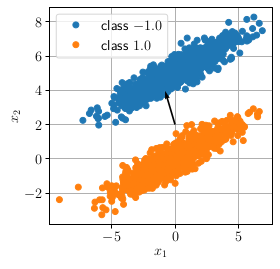

In [13]:
fig_data

In [14]:
fig_data.tight_layout()
fig_data.savefig('synthetic_data.pgf')

# Plot projection

In [15]:
fig, _ = plot_projected(X_projected, y)

In [16]:
fig.tight_layout()
fig.savefig('lda_projection.pgf')

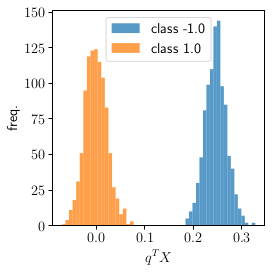

In [17]:
fig

# Applying PCA

In [18]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [19]:
x_projected_pca = pca.transform(X)

In [20]:
fig_pca, _ = plot_projected(x_projected_pca, y)

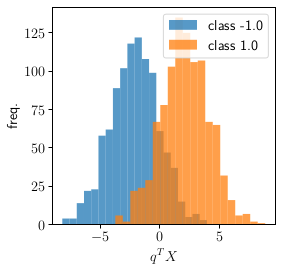

In [21]:
fig_pca